# Suicide In The United States, Asia Jones

Suicide has been an issue for many years. It is actually the 10th leading cause of death in the United States. Now with technology and social media people of all ages and genders are suceptible to experiences that may cause them to have suicidal thoughts.<br/>
At first thought most would assume the teenagers are the ones suffering the most from suicide. However, there are more factors than just school and cyberbulying that could make someone want to end their life. Even middle-aged celebrities are not exempt from the epidemic. My goal is to be able to analyze the data among suicide rates and its different categories to predict what groups of people should be the main targets for education, resources, and policies pertaining to suicide prevention. Data science can be used to find those trends, fit the model, draw conclusions from it and make predictions about what may happen in the future. Its possible the youth is our most at risk population, but it could be another group that we don't expect. Following the steps of the data life cycle should be able to provide reliable results

## Data Collection

The first thing I will do is collect the data on suicide from https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016. This data is in the form of csv. I will download the data to this project folder and save it into a variable I will call data.

In [1]:
import requests
import numpy as np
import pandas as pd

#Read data from csv and copy the table into data
data = pd.read_csv("master.csv")

#Display the first five values
data.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Data Processing

The table includes data from other countries. I just want to focus on the United States. I want to keep information about the year, sex, age, number of suicides, and suicide per 100k people (I will change this label to suicide rate). I will also be starting from 1995 so I can work with a smaller time period

In [2]:
#Just keep the parts of the table that I want
data = data[data['country'] == "United States" ]
data = data[data['year'] >= 1995]

#Drop the columns I dont need
del data['population']
del data['country-year']
del data['HDI for year']
del data['gdp_per_capita ($)']
del data ['generation']
del data [' gdp_for_year ($) ']

#Change the column name 
data.rename(columns={'suicides/100k pop': 'suicide_rate'}, inplace=True)

#Diplay first five rows
data.head()


,country,year,sex,age,suicides_no,suicide_rate
26968,United States,1995,male,75+ years,2580,48.25
26969,United States,1995,male,25-34 years,5234,25.62
26970,United States,1995,male,55-74 years,4607,25.06
26971,United States,1995,male,35-54 years,8545,23.58
26972,United States,1995,male,15-24 years,4132,22.52


First I would like to examine the data based on gender, so I will have two different tables. One table with males and all the data, another with females and the rest of the data

In [3]:
#Female table
females = data[data['sex'].str.contains('female')]
females.head()

,country,year,sex,age,suicides_no,suicide_rate
26973,United States,1995,female,35-54 years,2454,6.58
26974,United States,1995,female,75+ years,516,5.47
26975,United States,1995,female,55-74 years,1157,5.38
26976,United States,1995,female,25-34 years,1058,5.18
26977,United States,1995,female,15-24 years,652,3.71


In [4]:
#If I use contains it will also include the females because male is within female. So must use match instead
#Male table
males = data[data['sex'].str.match('male')]
males.head()

,country,year,sex,age,suicides_no,suicide_rate
26968,United States,1995,male,75+ years,2580,48.25
26969,United States,1995,male,25-34 years,5234,25.62
26970,United States,1995,male,55-74 years,4607,25.06
26971,United States,1995,male,35-54 years,8545,23.58
26972,United States,1995,male,15-24 years,4132,22.52


## Analysis and Data Visualization
Now that I have my two tables with data for females and data for males I can create plots to make comparisons. First I want to show the the relationship between number of suicides between males and females each year regardless of the age groups. I'll do this by making violin plots to see the distribution of the number of suicides. You can see how to make violin plots here https://seaborn.pydata.org/generated/seaborn.violinplot.html

Text(0.5, 1.0, 'Number of Suicides vs Year for Females')

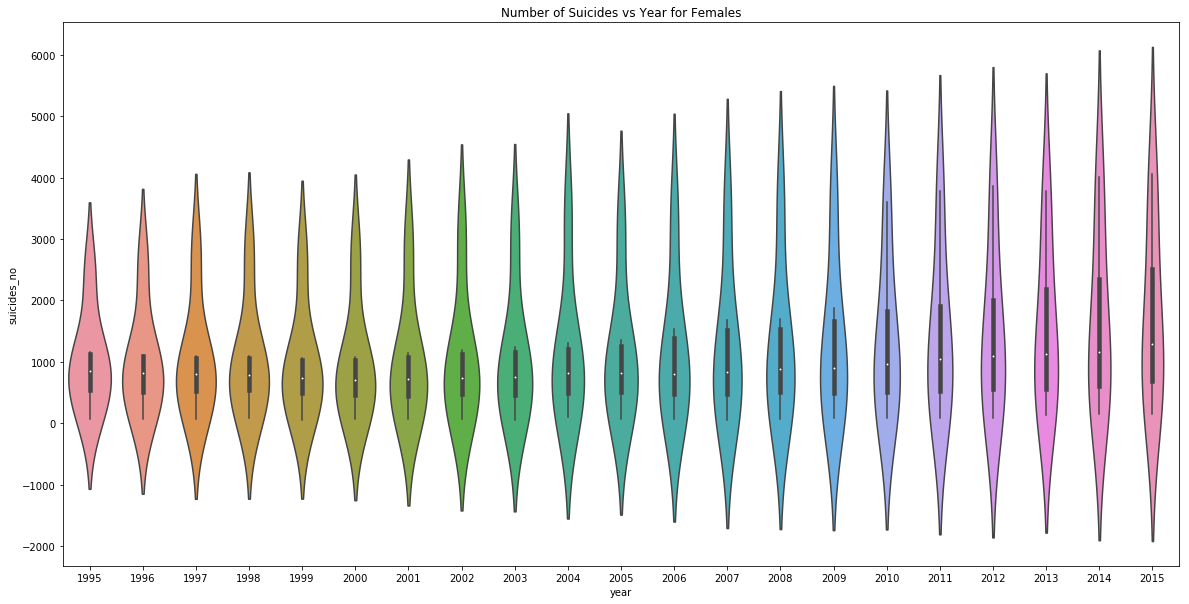

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

#Female violin plot
#Make plot easier to view
plt.figure(figsize=(20,10))
ax = sns.violinplot(x ='year' , y='suicides_no', data=females)
ax.set_title("Number of Suicides vs Year for Females")


Text(0.5, 1.0, 'Number of Suicides vs Year for Males')

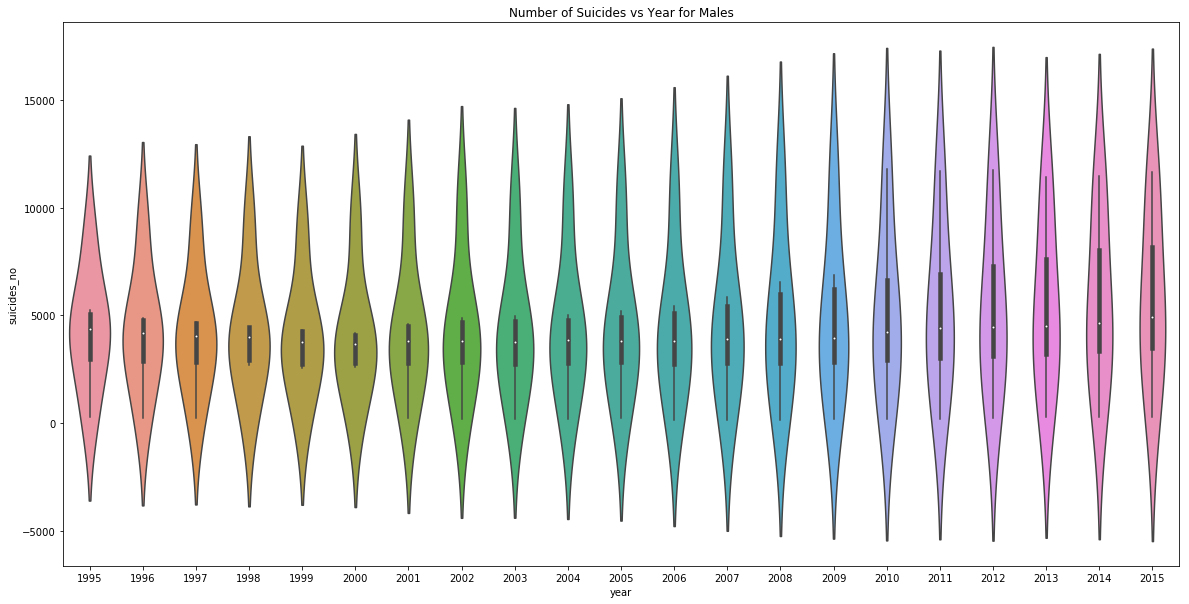

In [6]:
#Male violin plot
plt.figure(figsize=(20,10))
ax2 = sns.violinplot(x ='year' , y='suicides_no', data=males)
ax2.set_title("Number of Suicides vs Year for Males")

From the two plots it can be concluded that the number of suicides increased with both the male and female population, however there is a larger number of suicides among the males. Lets plot the rates of suicide in the same graph to get a better look at the difference between the genders. Here is a resource on the different types of plots you can create https://matplotlib.org/users/pyplot_tutorial.html

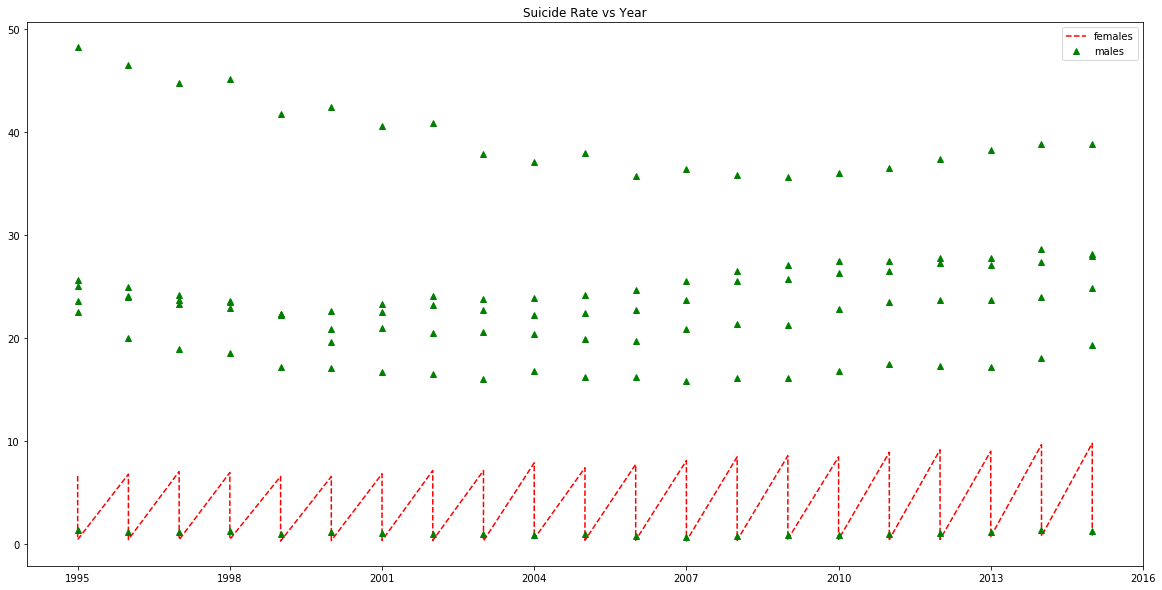

In [7]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(20,10))
plt.plot(females['year'],females['suicide_rate'], 'r--', label='females')
plt.plot(males['year'],males['suicide_rate'], 'g^', label='males')
plt.title('Suicide Rate vs Year')
plt.legend()

#Want the x axis to be integers instead of floats
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    
plt.show()

It is clear that the male population has a much larger suicide rate than the female population each year.

Now I am going to make plots that will show the relationship between age groups and the rate of suicide. These plots will also be seperated by gender. This information will hopefully give insight into which age groups are contributing the most to suicide numbers. That will also explain the distribution from the violin plots above. 


I'm going to seperate the ages into these groups
1. 5 - 14 years old
2. 15 - 24 years old
3. 25 - 34 years old
4. 35 - 54 years old
5. 55 - 74 years old
6. 75 and up





First I'll make the plots for the female population. Do this by grouping the table by the ages, then make a seperate plot for each age

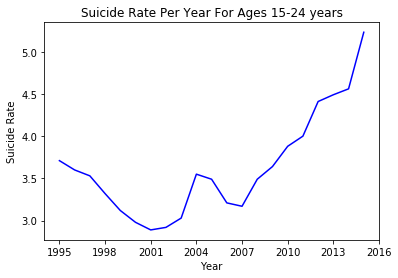

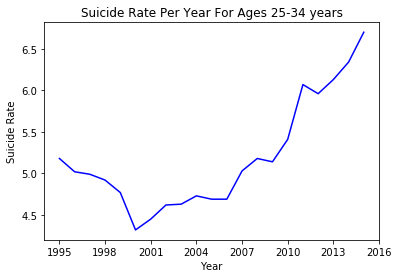

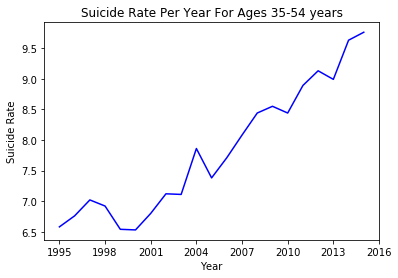

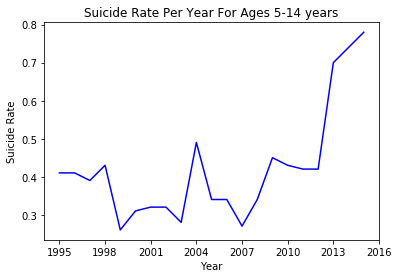

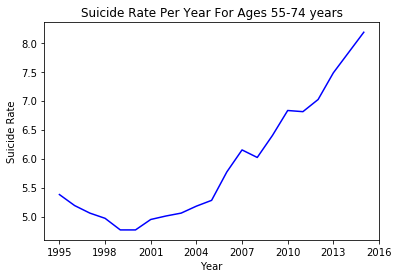

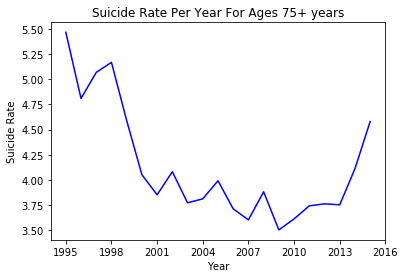

In [8]:
#Grouping table by ages
group1 = females.groupby('age')

#Break up the age groups into different plots for females
for (x,y) in group1:
    age = group1.get_group(x)
    plt.plot(age.year, age['suicide_rate'], color='blue')
    plt.title('Suicide Rate Per Year For Ages ' + x)
    plt.xlabel('Year')
    plt.ylabel('Suicide Rate')
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.show()


From the plots it seems that the 75 and older group are the only ones the experienced a general drop in suicide rates since 1995. The other age groups have increased in suicide rates with 35-54 year olds being the group with the highest suicide rate with a low of approximately 6.5% and high of approximately 9.5%.

Now I will generate the plot for the male population by following the same procedure I did with the female population above

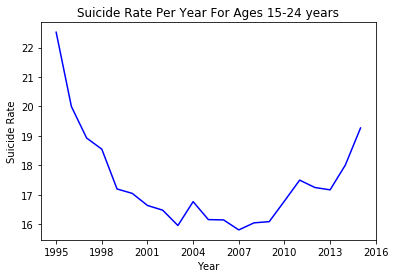

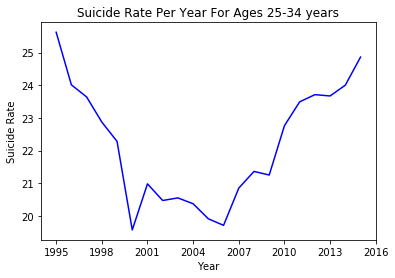

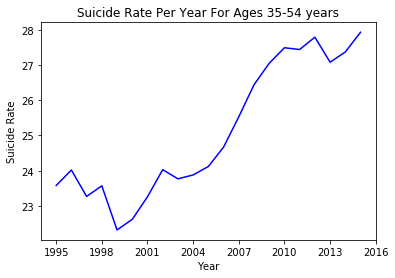

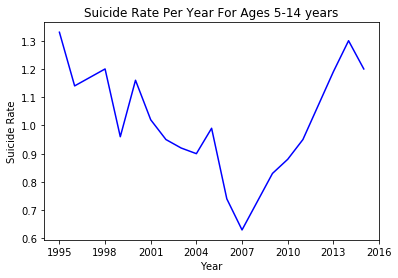

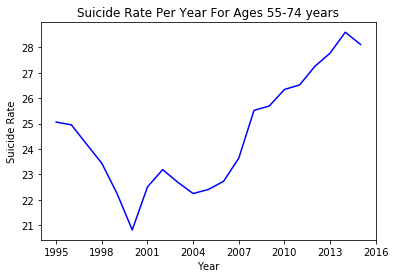

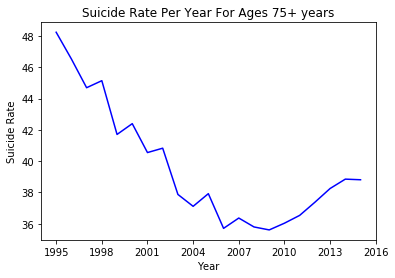

In [9]:
group2 = males.groupby('age')
for (x,y) in group2:
    age = group2.get_group(x)
    plt.plot(age.year, age['suicide_rate'], color='blue')
    plt.title('Suicide Rate Per Year For Ages ' + x)
    plt.xlabel('Year')
    plt.ylabel('Suicide Rate')
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.show()

Similar to the females, the 75 and up group for the males had a general drop in suicide rates. The rest of the groups have a more strange looking trend where there was a period where suicide rates dropped but then spiked upwards. The 35-54 year olds seem to have the largest more continuous increase in suicide rates, same as the females groups. 

At first glance it seems that males are a at higher risk of committing suicide than females are. It is also apparent that people between the ages 35 and 54 are at higher risks of commiting suicide. So it is my prediction that males between the age of 35 and 54 should be the targets of suicide prevention. The next step is to test the data in order to see if my prediction could be correct.

## Hypothesis Testing

I am going to fit a linear regression to the the previous graphs in order to determine if I can reject the null hypothesis of there being no relationship between suicide rates and gender as well as sucide rates and age. If there is a relationship I am going to be able to predict the rate of suicide in the upcoming years.

Here I am going to plot a linear regression line for both males and females by first creating the linear regession lines. Then, I'll plot both the male and female plot along with the regression lines

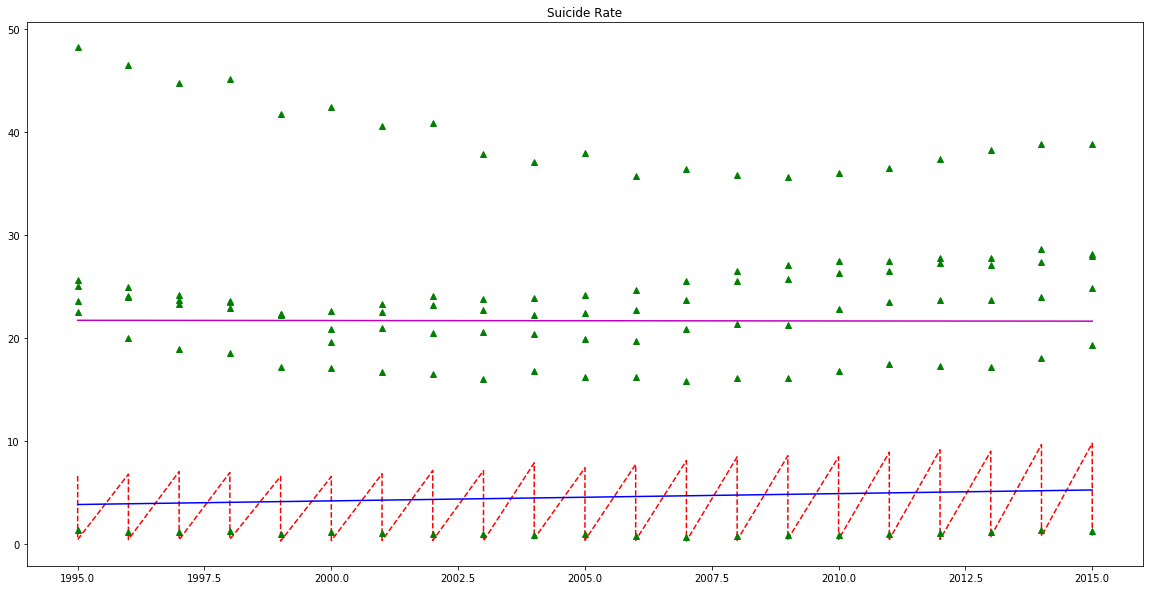

In [10]:
import sklearn.linear_model as lm

plt.figure(figsize=(20,10))

#Regression for female plot
reg = lm.LinearRegression()
X = females['year'].values[:,np.newaxis]
reg.fit(X,females['suicide_rate'])
female_line = reg.predict(X)

plt.title('Suicide Rate')


#Female plot
plt.plot(females['year'],females['suicide_rate'], 'r--', label='females')
plt.plot(X,female_line, color = 'b', label='Female regression')


#Regression for male plot
Y = males['year'].values[:,np.newaxis]
reg.fit(Y,males['suicide_rate'])
male_line = reg.predict(Y)

#Male plot
plt.plot(males['year'], males['suicide_rate'], 'g^', label='males')
plt.plot(Y,male_line, color='m', label='Male regression')




plt.show()




I am going to print out the regression results to get a closer look at the linear regression. In order to interpert the ols results you can check out this link http://resources.esri.com/help/9.3/arcgisdesktop/com/gp_toolref/spatial_statistics_tools/interpreting_ols_results.htm


Create the ols regression model for both males and females then add a interaction term of year times sex to see if there is a relatinoship between the suicide rate and gender each year

In [11]:
import statsmodels.formula.api as smf

female_stats = smf.ols(formula='suicide_rate ~ year', data= females).fit()
male_stats = smf.ols(formula='suicide_rate ~ year', data=males).fit()
#Interaction term
stats = smf.ols(formula="suicide_rate ~ year*sex", data=data).fit()

print("Female: " )
print(female_stats.rsquared)
print("\nMale: ")
print(male_stats.rsquared)
print("\nInteraction:" )
print(stats.summary())

Female: 
0.03195975180048216

Male: 
4.575587015054339e-06

Interaction:
                            OLS Regression Results                            
Dep. Variable:           suicide_rate   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     85.93
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           3.75e-38
Time:                        23:37:19   Log-Likelihood:                -894.22
No. Observations:                 252   AIC:                             1796.
Df Residuals:                     248   BIC:                             1811.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

The linear regression lines don't seem to fit the data and the low r-values also proves that this isn't a good model. However the interaction has a decent r value enough to think that maybe the gender plays a role. Let's plot the regression model for the females then the males for each age


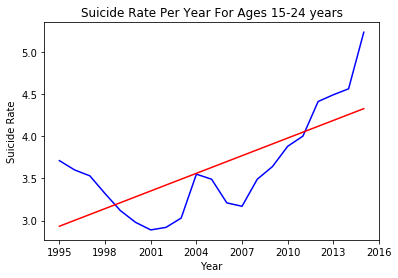

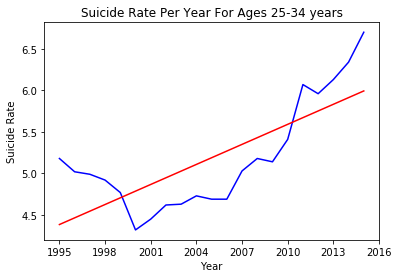

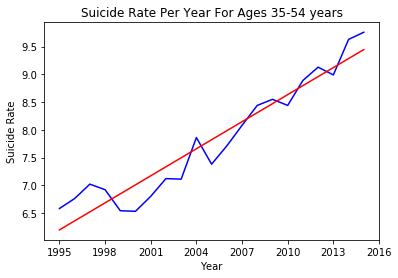

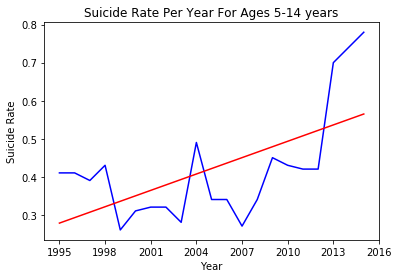

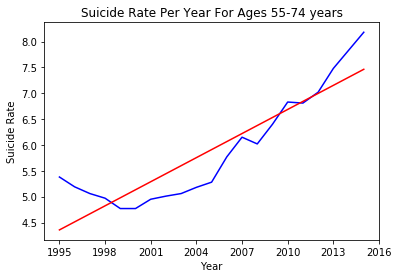

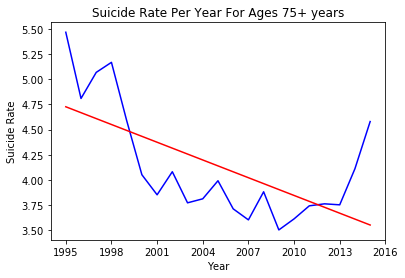

In [12]:
for (x,y) in group1:
    age = group1.get_group(x)
    X = age['year'].values[:,np.newaxis]
    reg.fit(X,age['suicide_rate'])
    female_line = reg.predict(X)
    
    plt.plot(age.year, age['suicide_rate'], color='blue')
    
    plt.plot(X,female_line, color = 'r')
    
    plt.title('Suicide Rate Per Year For Ages ' + x)
    plt.xlabel('Year')
    plt.ylabel('Suicide Rate')
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.show()

They all have a positive regression except the 75 and older group has a negative regression. Ages 35-54 has the best looking regression fit. <br/> Now to look at the regression for the males

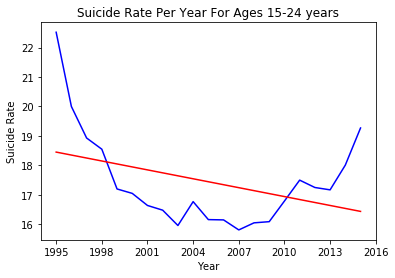

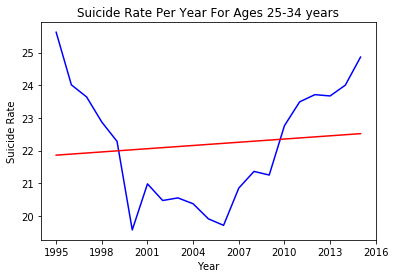

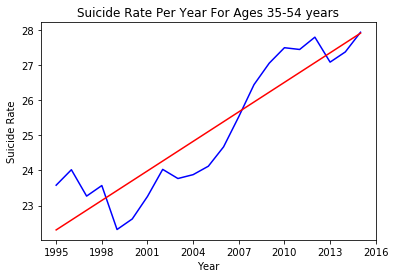

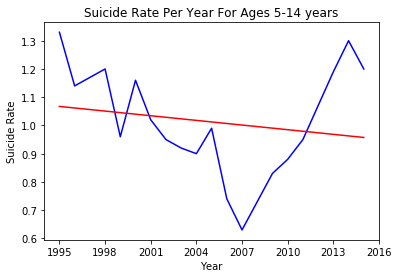

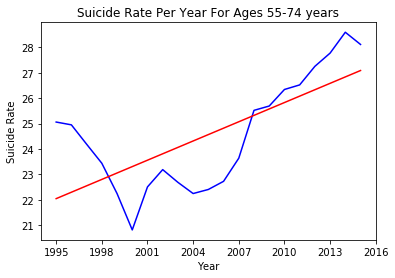

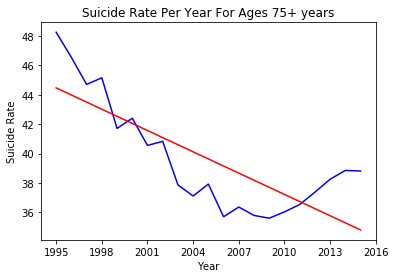

In [13]:
for (x,y) in group2:
    age = group2.get_group(x)
    X = age['year'].values[:,np.newaxis]
    reg.fit(X,age['suicide_rate'])
    male_line = reg.predict(X)
    
    plt.plot(age.year, age['suicide_rate'], color='blue')
    
    plt.plot(X,male_line, color = 'r')
    
    plt.title('Suicide Rate Per Year For Ages ' + x)
    plt.xlabel('Year')
    plt.ylabel('Suicide Rate')
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.show()

A lot of these regression lines are not very good fits. The best one would be the ages 35-54. The 15-24 group and 75 and up group have negative regressions, while the rest are positive. <br/> Like with the gender and suicide rate I am going to add a interaction term for the female and male plots. The interaction term will be the ages. This will show age is a variable in which suicide is dependent upon according to the model.

In [14]:
#Interaction term for year and age
female_stats2 = smf.ols(formula='suicide_rate ~ year*age', data= females).fit()
print(female_stats2.summary())

                            OLS Regression Results                            
Dep. Variable:           suicide_rate   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     398.4
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           1.80e-85
Time:                        23:37:24   Log-Likelihood:                -57.084
No. Observations:                 126   AIC:                             138.2
Df Residuals:                     114   BIC:                             172.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -

There is a high r value, so this model shows there is a strong relationship between the suicide rate and the age groups. The p-value also tells us we can use this model to predict for each age group except ages 25-34 for the females (if the p-value is less than .05 then I can reject the null hypothesis, in this case the null hypothesis is that there is no relationship between suicide rates and age). Next is the results for the males

In [15]:
male_stats2 = smf.ols(formula='suicide_rate ~ year*age', data= males).fit()
print(male_stats2.summary())

                            OLS Regression Results                            
Dep. Variable:           suicide_rate   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     600.6
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           2.11e-95
Time:                        23:37:24   Log-Likelihood:                -231.44
No. Observations:                 126   AIC:                             486.9
Df Residuals:                     114   BIC:                             520.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

The males have a higher r value than the females. The p values show that this model can be used to predict for the age groups of 35-54, 55-74, and 75+. 

Now I will print the coefficients to see the average at which each age groups suicide rate is increasing

In [16]:
print ("Male: " , male_stats2.params)
print ("\nFemale: ",female_stats2.params)

Male:  Intercept                  219.247186
age[T.25-34 years]        -263.016732
age[T.35-54 years]        -755.124372
age[T.5-14 years]         -207.220325
age[T.55-74 years]        -699.522944
age[T.75+ years]           788.906255
year                        -0.100649
year:age[T.25-34 years]      0.133545
year:age[T.35-54 years]      0.380442
year:age[T.5-14 years]       0.095156
year:age[T.55-74 years]      0.352442
year:age[T.75+ years]       -0.382403
dtype: float64

Female:  Intercept                 -135.887229
age[T.25-34 years]         -20.183009
age[T.35-54 years]        -182.455844
age[T.5-14 years]          107.535606
age[T.55-74 years]        -169.654784
age[T.75+ years]           258.164091
year                         0.069584
year:age[T.25-34 years]      0.010844
year:age[T.35-54 years]      0.093091
year:age[T.5-14 years]      -0.055234
year:age[T.55-74 years]      0.085753
year:age[T.75+ years]       -0.128506
dtype: float64


Males from ages 35-54 have the highest suicide rates increasing at an average of .380442 each year.


Females from ages 35-54 have the highest suicide rates increasing at an average of .093091 each year

## Interpretation

In both genders the same age group, 35-54 years old, have the highest rates of suicide increasing each year. Although the age group is the same across genders, the rate itself is a lot higher in the male population. With this information I believe 35 to 54 year old men need to be the target of suicide prevention. If we can work harder to educate these men and have resources and advice frequently pop up in commercials of channels they watch, or Ads on websites they visit, then eventually maybe they will seek the help they need. After doing this project and making my conclusions I read this article https://www.nimh.nih.gov/health/statistics/suicide.shtml, it states within the article that in 2017 the fourth leading cause of death among individuals ages 35-54 is suicide. This supports my findings based on the rates from 1995-2015.

## Sources used
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/

https://seaborn.pydata.org/generated/seaborn.violinplot.html

https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html

https://www.scivision.dev/matplotlib-force-integer-labeling-of-axis/

https://matplotlib.org/users/legend_guide.html

http://resources.esri.com/help/9.3/arcgisdesktop/com/gp_toolref/spatial_statistics_tools/interpreting_ols_results.htm